In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [55]:
# Load CSV
df = pd.read_csv(r"rotten_tomatoes_best_movies_final.csv")

In [56]:
display(df.head())

,Rank,Title,Year of Release,Critic Score,Synopsis,Movie URL,Genre,Director,Runtime,Rating,Box Office (Gross USA),Original Language
0,#1,The Godfather,1972,97%,Synopsis: Widely regarded as one of the greate...,https://www.rottentomatoes.com/m/the_godfather,"Crime, Drama",Francis Ford Coppola,2h 57m,R,$134.8M,English
1,#2,Casablanca,1942,99%,"Synopsis: Rick Blaine (Humphrey Bogart), who o...",https://www.rottentomatoes.com/m/1003707-casab...,Drama,Michael Curtiz,1h 42m,PG,NaN,English
2,#3,L.A. Confidential,1997,99%,"Synopsis: Three policemen, each with his own m...",https://www.rottentomatoes.com/m/la_confidential,"Crime, Drama",Curtis Hanson,2h 16m,R,$64.6M,English
3,#4,Seven Samurai,1954,100%,Synopsis: A samurai answers a village's reques...,https://www.rottentomatoes.com/m/seven_samurai...,Action,Akira Kurosawa,3h 28m,NaN,$487.3K,Japanese
4,#5,Parasite,2019,99%,Synopsis: Greed and class discrimination threa...,https://www.rottentomatoes.com/m/parasite_2019,"Comedy, Mystery & Thriller, Drama",Bong Joon Ho,2h 12m,R (Sexual Content|Language|Some Violence),$53.7M,Korean


In [57]:
for col in df.columns:
    print(f"'{col}'")

'Rank'
'Title'
'Year of Release'
'Critic Score'
'Synopsis'
'Movie URL'
'Genre'
'Director'
'Runtime'
'Rating'
'Box Office (Gross USA)'
'Original Language'


In [58]:
print(df.isnull().sum())

Rank                        0
Title                       0
Year of Release             0
Critic Score                0
Synopsis                    0
Movie URL                   0
Genre                       1
Director                    1
Runtime                     1
Rating                     88
Box Office (Gross USA)    104
Original Language           4
dtype: int64


In [59]:
print(df['Critic Score'].dtype)
print(df['Critic Score'].head(10))

object
0     97%
1     99%
2     99%
3    100%
4     99%
5     98%
6     96%
7     98%
8     99%
9    100%
Name: Critic Score, dtype: object


In [60]:
# -----------------------
# Clean 'Critic Score' column
# -----------------------
# Make sure the column is treated as a string, remove '%' sign and convert to float
df['Critic Score'] = df['Critic Score'].astype(str).str.replace('%', '', regex=False)

# Convert to numeric (float)
df['Critic Score'] = pd.to_numeric(df['Critic Score'], errors='coerce')

# Fill missing values with the column mean
df['Critic Score'] = df['Critic Score'].fillna(df['Critic Score'].mean())

# Convert to integer type (optional: based on your preference)
df['Critic Score'] = df['Critic Score'].round().astype(int)

print(df['Critic Score'].head())  # Check the first few rows

0     97
1     99
2     99
3    100
4     99
Name: Critic Score, dtype: int32


In [61]:
# Fill missing Genre values with 'Unknown'
df['Genre'] = df['Genre'].fillna('Unknown')
# Fill missing Director values with 'Unknown'
df['Director'] = df['Director'].fillna('Unknown')

In [62]:

# Convert runtime to minutes using regex
def convert_runtime_to_minutes(runtime):
    # Convert value to string and strip any leading/trailing spaces
    runtime = str(runtime).strip()
    
    # Use regex to extract hours and minutes
    hours_match = re.search(r'(\d+)\s*h', runtime)  # Search for hours (h)
    minutes_match = re.search(r'(\d+)\s*m', runtime)  # Search for minutes (m)

    # If hours are found, assign the value; otherwise, set hours to 0
    hours = int(hours_match.group(1)) if hours_match else 0
    # If minutes are found, assign the value; otherwise, set minutes to 0
    minutes = int(minutes_match.group(1)) if minutes_match else 0
    
    # Return total runtime in minutes (hours * 60 + minutes)
    return hours * 60 + minutes

# Apply the function to the 'Runtime' column
df['Runtime'] = df['Runtime'].apply(convert_runtime_to_minutes)

# Print the first 5 values to verify the result
print(df['Runtime'].head())


0    177
1    102
2    136
3    208
4    132
Name: Runtime, dtype: int64


In [63]:
print(df['Rating'].unique())

['R' 'PG' nan 'R (Sexual Content|Language|Some Violence)'
 'R (Language|Actuality Violence|Some Sexuality)'
 'PG-13 (Some Strong Language|Sequences of Intense Action)' 'G'
 'PG (Sequences of Intense Action|Brief Mild Language|Some Scary Images)'
 'PG (Some Peril and Action)' 'PG-13 (Creature Violence and Action)'
 'R (Nudity|Language|Sexuality|Some Drug Use|Violence)'
 'R (Some Language|Sexual References)' 'PG-13 (Mature Thematic Material)'
 'PG (Mild Language|Frenetic Action Violence|Thematic Elements)'
 'PG (Some Scary Moments)' 'PG (Some Action|Mild Thematic Elements)'
 'PG (Thematic Elements)' 'PG (Rude Humor|Action|Some Thematic Elements)'
 'PG-13 (Brief Strong Language|A Suggestive Moment|Disturbing Thematic Material|Violence)'
 'PG-13 (Intense Sequences of Action|Brief Strong Language|Violence)'
 'R (Some Sexual Content and Nudity)' 'R (Brief Strong Sex Scene)'
 'PG-13 (Drug Material|Brief Violence|Sexual References|Some Strong Language|Thematic Elements)'
 'R (Brief Nudity|Bloo

In [64]:
# Clean the data Rating
df['Rating'] = df['Rating'].str.replace(r'\(.*\)', '', regex=True).str.strip()  # Remove text inside parentheses
df['Rating'] = df['Rating'].fillna('Unclassified')  # Replace missing values with "Unclassified"
df['Rating'] = df['Rating'].str.upper()  # Convert values to uppercase

# Standardize the ratings
df['Rating'] = df['Rating'].replace({
    'R': 'R',
    'PG': 'PG',
    'PG-13': 'PG-13',
    'G': 'G',
    'TV-14': 'TV-14',
    'Unclassified': 'Unclassified'
})

# Print unique ratings after cleaning
print(df['Rating'].unique())  # It will show the cleaned ratings

['R' 'PG' 'UNCLASSIFIED' 'PG-13' 'G' 'TV-14']


In [65]:
print(df['Rating'].tolist())

['R', 'PG', 'R', 'UNCLASSIFIED', 'R', 'R', 'PG-13', 'R', 'UNCLASSIFIED', 'G', 'PG', 'UNCLASSIFIED', 'G', 'G', 'PG', 'G', 'PG', 'UNCLASSIFIED', 'PG-13', 'G', 'G', 'R', 'R', 'PG-13', 'PG', 'UNCLASSIFIED', 'UNCLASSIFIED', 'PG', 'PG', 'UNCLASSIFIED', 'PG', 'PG', 'UNCLASSIFIED', 'PG', 'R', 'PG-13', 'PG-13', 'PG', 'G', 'R', 'R', 'PG', 'PG-13', 'R', 'PG', 'G', 'PG', 'PG', 'UNCLASSIFIED', 'PG-13', 'R', 'UNCLASSIFIED', 'R', 'UNCLASSIFIED', 'R', 'UNCLASSIFIED', 'UNCLASSIFIED', 'PG', 'R', 'UNCLASSIFIED', 'UNCLASSIFIED', 'R', 'R', 'UNCLASSIFIED', 'UNCLASSIFIED', 'PG-13', 'UNCLASSIFIED', 'UNCLASSIFIED', 'R', 'R', 'PG-13', 'R', 'R', 'PG-13', 'R', 'UNCLASSIFIED', 'R', 'R', 'UNCLASSIFIED', 'UNCLASSIFIED', 'G', 'PG', 'R', 'UNCLASSIFIED', 'PG-13', 'UNCLASSIFIED', 'UNCLASSIFIED', 'UNCLASSIFIED', 'UNCLASSIFIED', 'PG', 'R', 'UNCLASSIFIED', 'UNCLASSIFIED', 'UNCLASSIFIED', 'UNCLASSIFIED', 'UNCLASSIFIED', 'R', 'PG-13', 'TV-14', 'UNCLASSIFIED', 'UNCLASSIFIED', 'UNCLASSIFIED', 'R', 'UNCLASSIFIED', 'R', 'UNCLASS

In [66]:
# -----------------------
# Clean 'Box Office (Gross USA)' column
# -----------------------

# Remove '$' and ',' symbols, then convert to numeric
df['Box Office (Gross USA)'] = df['Box Office (Gross USA)'].replace({r'\$': '', r',': ''}, regex=True)

# Convert to numeric
df['Box Office (Gross USA)'] = pd.to_numeric(df['Box Office (Gross USA)'], errors='coerce')

# Fill missing values with the mean
df['Box Office (Gross USA)'] = df['Box Office (Gross USA)'].fillna(df['Box Office (Gross USA)'].mean())

# Print first 5 values to check
print(df['Box Office (Gross USA)'].head())


0    345.0
1    345.0
2    345.0
3    345.0
4    345.0
Name: Box Office (Gross USA), dtype: float64


In [67]:
# -----------------------
# Clean 'Original Language' column
# -----------------------
# Fill missing values with 'Unknown' or handle as needed
df['Original Language'] = df['Original Language'].fillna('Unknown')

# Print first 5 values to check
print(df['Original Language'].head())

0     English
1     English
2     English
3    Japanese
4      Korean
Name: Original Language, dtype: object


In [68]:
print(df.isnull().sum())

Rank                      0
Title                     0
Year of Release           0
Critic Score              0
Synopsis                  0
Movie URL                 0
Genre                     0
Director                  0
Runtime                   0
Rating                    0
Box Office (Gross USA)    0
Original Language         0
dtype: int64


In [69]:
# create processing for data 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [70]:
# Step 1: Feature Engineering
# -------------------------
# Label Encoding for 
label_encoder = LabelEncoder()
df['Genre_encoded'] = label_encoder.fit_transform(df['Genre'])

In [71]:
display(df['Genre_encoded'].head())

0    36
1    42
2    36
3     0
4    34
Name: Genre_encoded, dtype: int32

In [72]:
# Step 2: Feature Scaling
# -------------------------
# Standardize numerical features 
scaler = StandardScaler()
df[['Box Office (Gross USA)', 'Runtime']] = scaler.fit_transform(df[['Box Office (Gross USA)', 'Runtime']])


In [73]:
display(df[['Box Office (Gross USA)', 'Runtime']].head())

,Box Office (Gross USA),Runtime
0,0.0,2.146432
1,0.0,-0.567212
2,0.0,0.662973
3,0.0,3.268071
4,0.0,0.518246


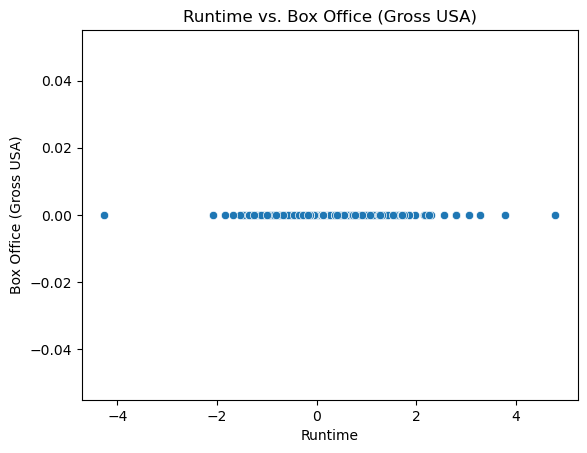

In [74]:
# Scatter plot between 'Runtime' and 'Box Office (Gross USA)'
sns.scatterplot(x='Runtime', y='Box Office (Gross USA)', data=df)
plt.title('Runtime vs. Box Office (Gross USA)')
plt.xlabel('Runtime')
plt.ylabel('Box Office (Gross USA)')
plt.show()


In [75]:
# -------------------------
# Step 3: Model Training (Optional, for predictive modeling)
# -------------------------
# Select features and target variable for model
X = df[['Runtime', 'Genre_encoded']]  # Features
y = df['Box Office (Gross USA)']  # Target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model (Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.0


In [76]:
#1-Measures of Central Tendency and Measures of Dispersion
print("\nBasic Statistics for Numerical Columns:")
print(df[['Critic Score', 'Runtime', 'Box Office (Gross USA)']].describe())

# Basic statistics for categorical columns
print("\nBasic Statistics for Categorical Columns:")
print(df[['Genre', 'Director', 'Rating', 'Original Language']].describe(include='object'))


numerical_cols = ['Critic Score', 'Runtime', 'Box Office (Gross USA)']
dispersion_metrics = pd.DataFrame(index=numerical_cols,
                                columns=['Range', 'Variance', 'Std Deviation', 'IQR'])

for col in numerical_cols:
    dispersion_metrics.loc[col, 'Range'] = df[col].max() - df[col].min()
    dispersion_metrics.loc[col, 'Variance'] = df[col].var()
    dispersion_metrics.loc[col, 'Std Deviation'] = df[col].std()
    dispersion_metrics.loc[col, 'IQR'] = df[col].quantile(0.75) - df[col].quantile(0.25)

print("Measures of Dispersion for Numerical Variables:")
display(dispersion_metrics)


Basic Statistics for Numerical Columns:
       Critic Score       Runtime  Box Office (Gross USA)
count    300.000000  3.000000e+02                   300.0
mean      96.470000  1.569115e-16                     0.0
std        2.464958  1.001671e+00                     0.0
min       89.000000 -4.257767e+00                     0.0
25%       95.000000 -6.757576e-01                     0.0
50%       97.000000 -1.692108e-01                     0.0
75%       98.000000  4.820637e-01                     0.0
max      100.000000  4.787712e+00                     0.0

Basic Statistics for Categorical Columns:
        Genre        Director Rating Original Language
count     300             300    300               300
unique    124             217      6                19
top     Drama  Akira Kurosawa      R           English
freq       51               7     93               210
Measures of Dispersion for Numerical Variables:


,Range,Variance,Std Deviation,IQR
Critic Score,11,6.07602,2.464958,3.0
Runtime,9.045479,1.003344,1.001671,1.157821
Box Office (Gross USA),0.0,0.0,0.0,0.0



MPAA Rating Distribution:


,Count,Percentage
Rating,,
R,93,31.0
UNCLASSIFIED,88,29.3
PG,55,18.3
PG-13,45,15.0
G,18,6.0
TV-14,1,0.3


C:\Users\LapStore\AppData\Local\Temp\ipykernel_11712\2906365675.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Rating', data=df, order=rating_counts.index, palette='viridis')


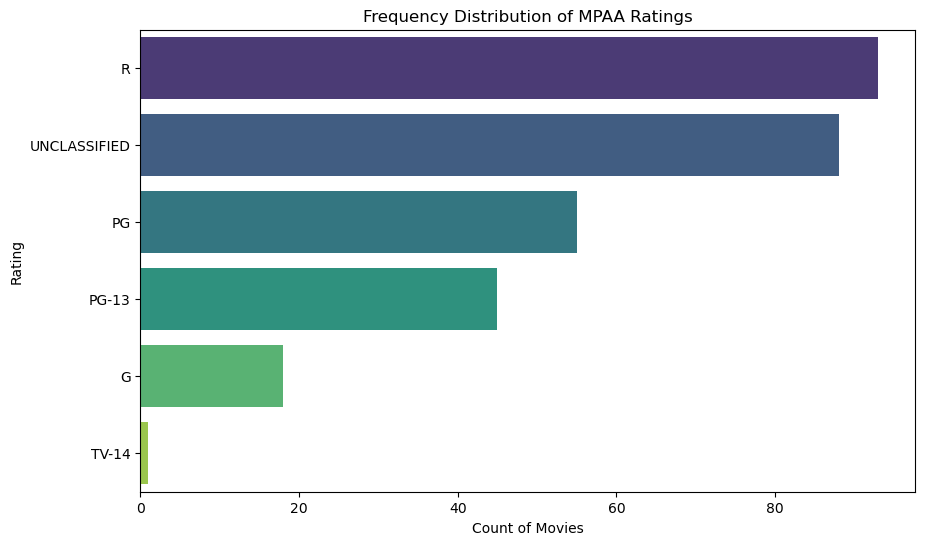


Top 15 Genre Distribution:


,Count,Percentage
Genre,,
Drama,165,24.2
Comedy,92,13.5
Adventure,65,9.5
Mystery & Thriller,47,6.9
Fantasy,41,6.0
Action,39,5.7
Crime,35,5.1
Kids & Family,30,4.4
Animation,30,4.4


C:\Users\LapStore\AppData\Local\Temp\ipykernel_11712\2906365675.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='rocket')


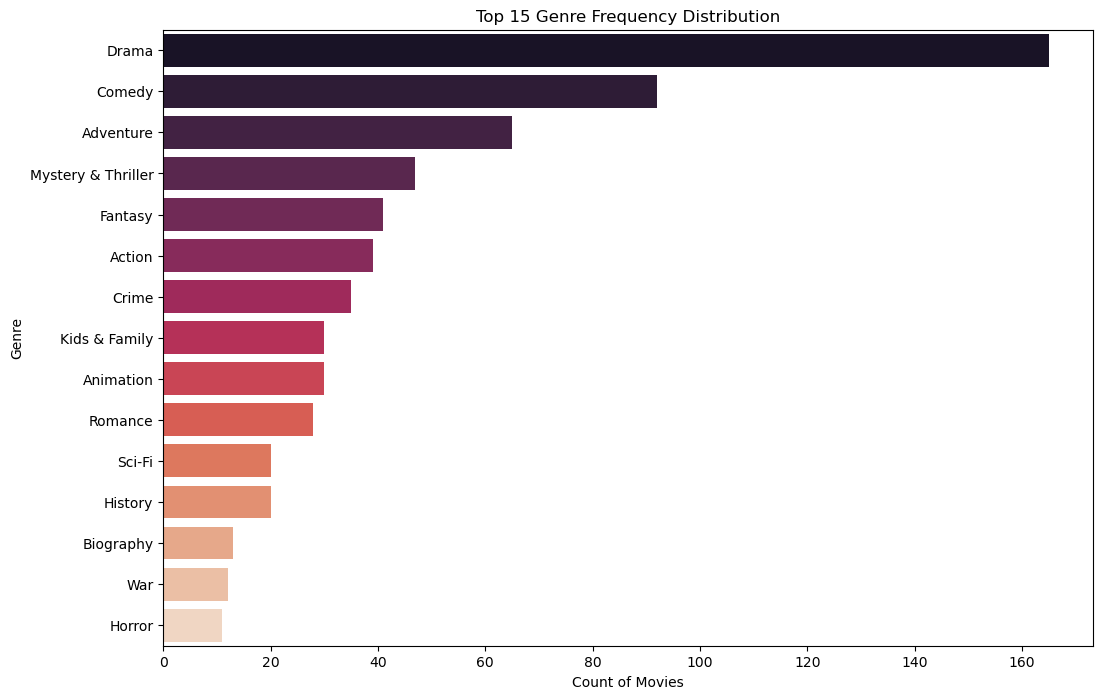


Original Language Distribution (Top 10):


,Count,Percentage
Original Language,,
English,210,70.0
French (France),14,4.7
Japanese,14,4.7
Canadian French,11,3.7
British English,10,3.3
Italian,9,3.0
German,7,2.3
Unknown,4,1.3
Korean,3,1.0


C:\Users\LapStore\AppData\Local\Temp\ipykernel_11712\2906365675.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Original Language',


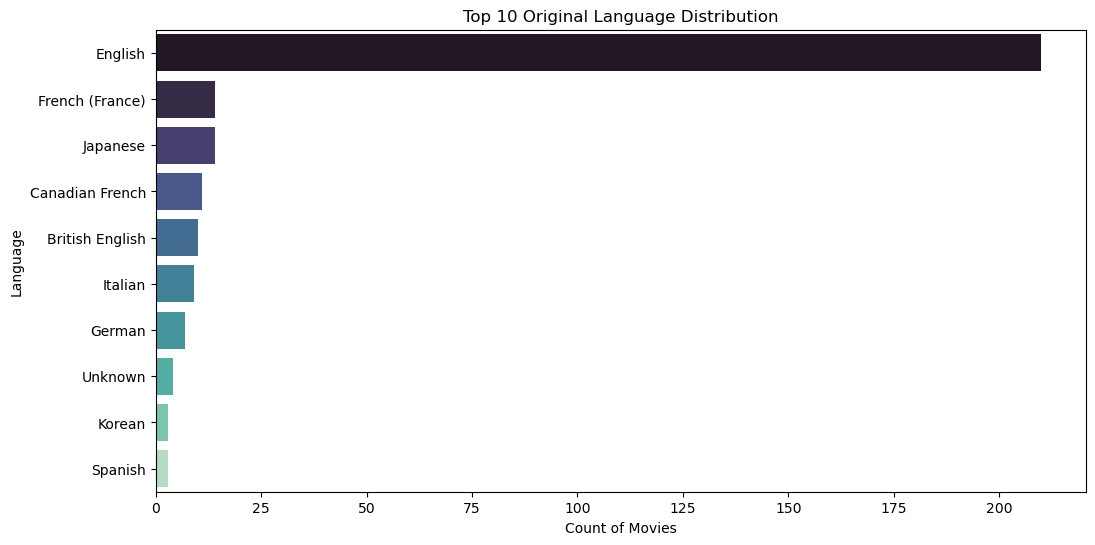

In [77]:
#2-Frequency Distributions and Percentages

rating_dist = df['Rating'].value_counts(normalize=True) * 100
rating_counts = df['Rating'].value_counts()

print("\nMPAA Rating Distribution:")
rating_df = pd.DataFrame({
    'Count': rating_counts,
    'Percentage': rating_dist.round(1)
})
display(rating_df)

plt.figure(figsize=(10, 6))
sns.countplot(y='Rating', data=df, order=rating_counts.index, palette='viridis')
plt.title('Frequency Distribution of MPAA Ratings')
plt.xlabel('Count of Movies')
plt.ylabel('Rating')
plt.show()

# Explode genres (since many movies have multiple genres)
genre_exploded = df['Genre'].str.split(', ').explode()

top_genres = genre_exploded.value_counts().head(15)
genre_percent = (genre_exploded.value_counts(normalize=True) * 100).head(15).round(1)

print("\nTop 15 Genre Distribution:")
genre_dist_df = pd.DataFrame({
    'Count': top_genres,
    'Percentage': genre_percent
})
display(genre_dist_df)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='rocket')
plt.title('Top 15 Genre Frequency Distribution')
plt.xlabel('Count of Movies')
plt.ylabel('Genre')
plt.show()

lang_dist = df['Original Language'].value_counts()
lang_percent = (df['Original Language'].value_counts(normalize=True) * 100).round(1)

print("\nOriginal Language Distribution (Top 10):")
lang_df = pd.DataFrame({
    'Count': lang_dist.head(10),
    'Percentage': lang_percent.head(10)
})
display(lang_df)

plt.figure(figsize=(12, 6))
sns.countplot(y='Original Language',
             data=df,
             order=df['Original Language'].value_counts().index[:10],
             palette='mako')
plt.title('Top 10 Original Language Distribution')
plt.xlabel('Count of Movies')
plt.ylabel('Language')
plt.show()

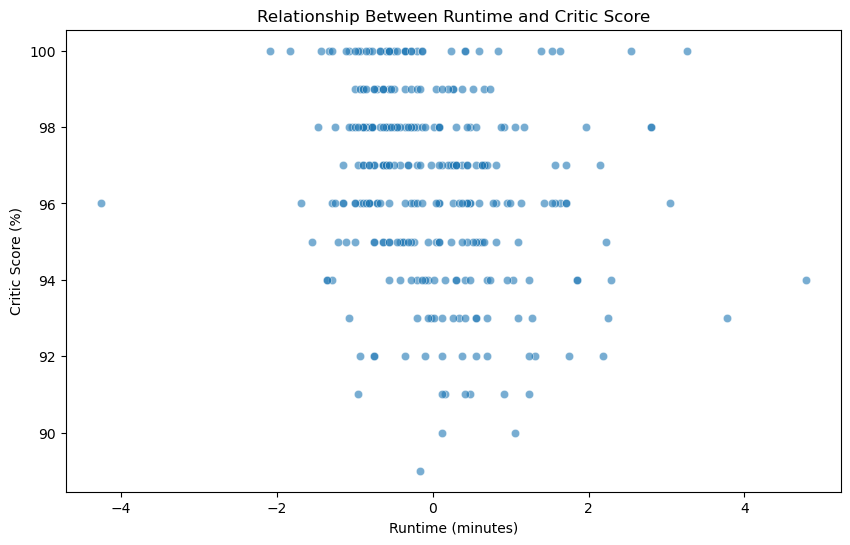


Correlation between Runtime and Critic Score: -0.23


In [78]:
#Relationship Between Runtime and Critic Score
# Scatter plot of Runtime vs Critic Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Runtime', y='Critic Score', data=df, alpha=0.6)
plt.title('Relationship Between Runtime and Critic Score')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Critic Score (%)')
plt.show()

# Calculate correlation
runtime_score_corr = df['Runtime'].corr(df['Critic Score'])
print(f"\nCorrelation between Runtime and Critic Score: {runtime_score_corr:.2f}")

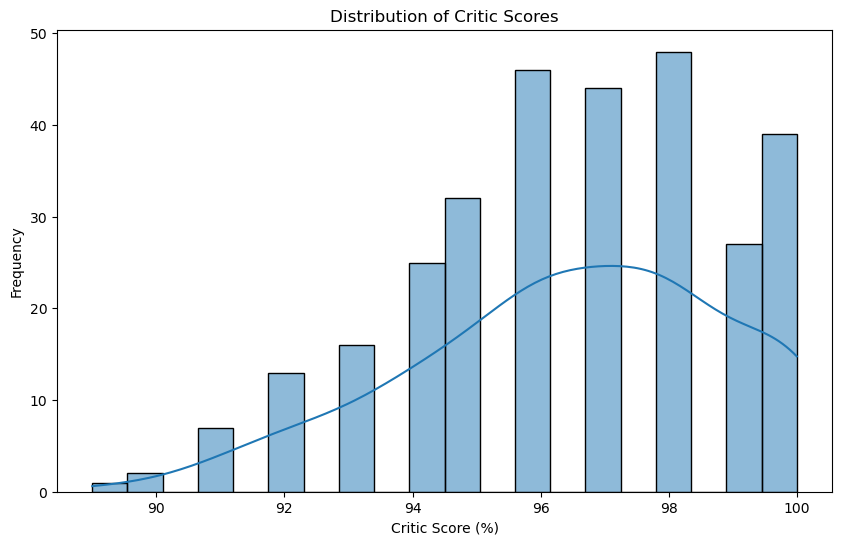

In [79]:
# Trends and Patterns
plt.figure(figsize=(10, 6))
sns.histplot(df['Critic Score'], bins=20, kde=True)
plt.title('Distribution of Critic Scores')
plt.xlabel('Critic Score (%)')
plt.ylabel('Frequency')
plt.show()

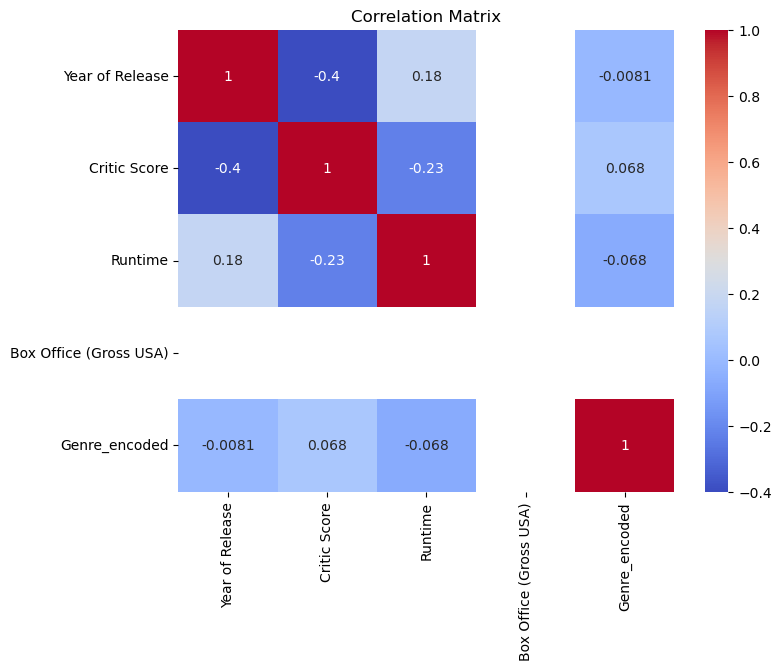

In [80]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



Top Directors with Most Highly Rated Movies:
Director
Akira Kurosawa       7
Billy Wilder         6
Alfred Hitchcock     6
Steven Spielberg     5
Charlie Chaplin      4
Martin Scorsese      4
Richard Linklater    4
Pete Docter          3
Frank Capra          3
Christopher Nolan    3
Name: count, dtype: int64


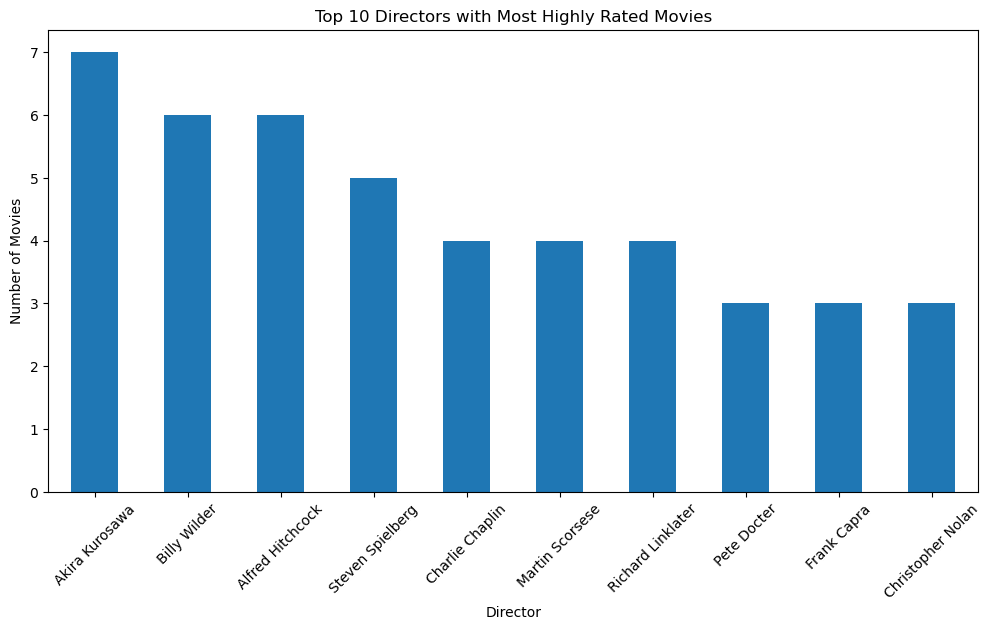

In [81]:
# Top directors by number of movies in the list
top_directors = df['Director'].value_counts().head(10)
print("\nTop Directors with Most Highly Rated Movies:")
print(top_directors)

plt.figure(figsize=(12, 6))
top_directors.plot(kind='bar')
plt.title('Top 10 Directors with Most Highly Rated Movies')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

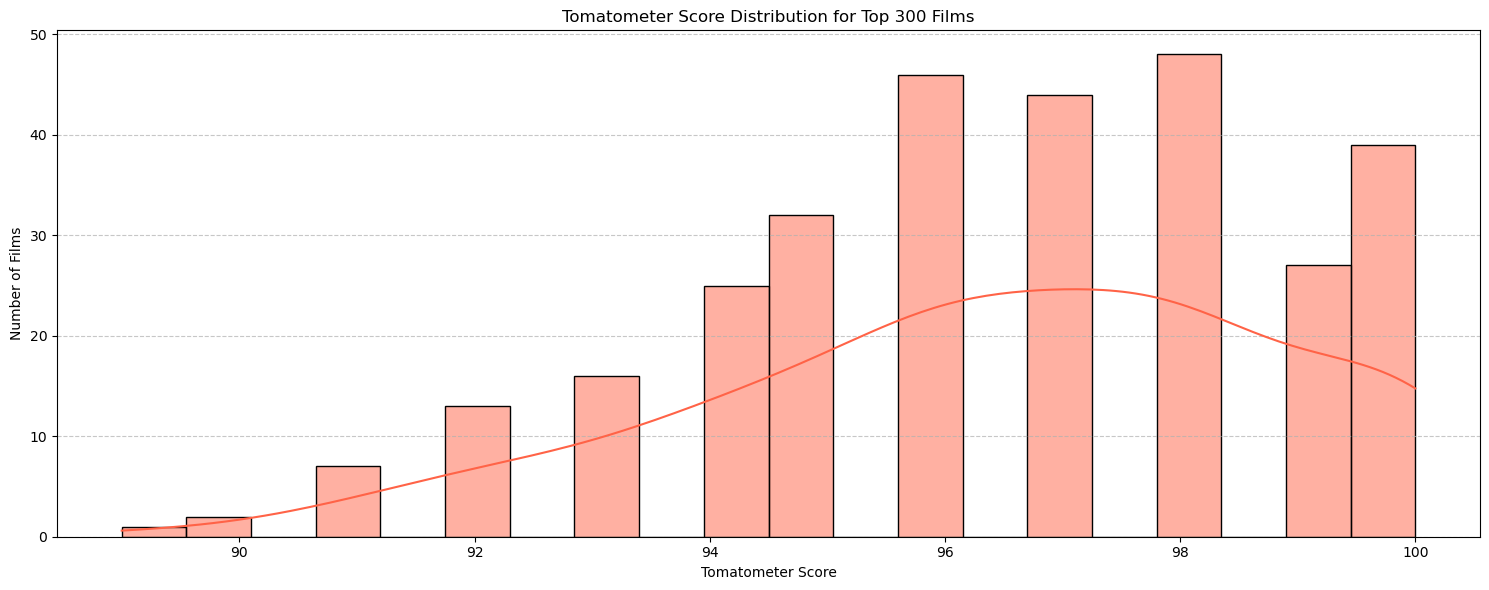

In [88]:

tomatometer_scores = np.array(df['Critic Score'])

# Plotting the histogram
plt.figure(figsize=(15, 6))
sns.histplot(tomatometer_scores, bins=20, kde=True, color='tomato', edgecolor='black')

plt.title('Tomatometer Score Distribution for Top 300 Films')
plt.xlabel('Tomatometer Score')
plt.ylabel('Number of Films')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


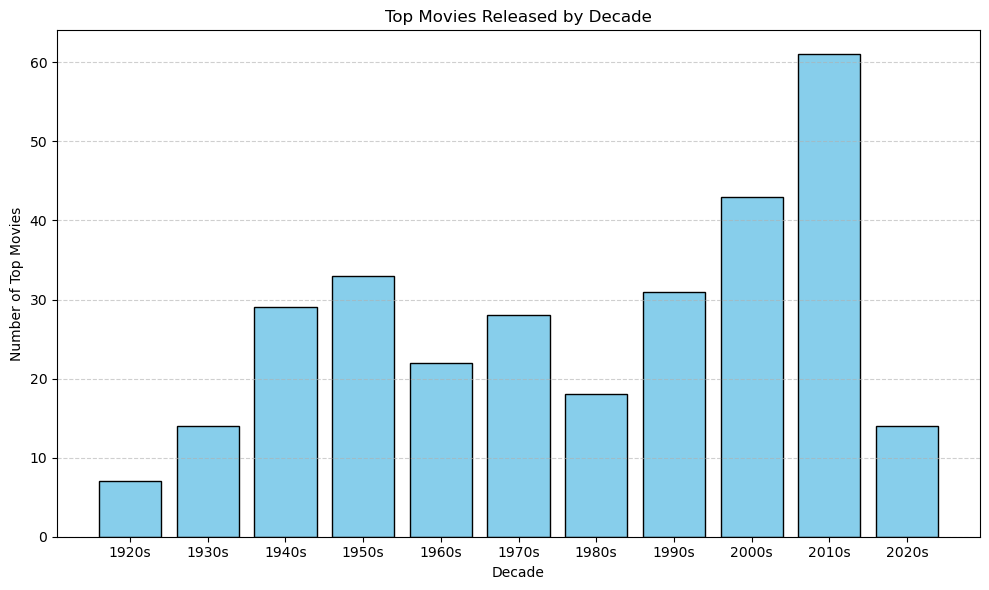

In [89]:

decades = (df['Year of Release'] // 10) * 10
decade_counts = pd.Series(decades).value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(decade_counts.index.astype(str) + 's', decade_counts.values, color='skyblue', edgecolor='black')

plt.title('Top Movies Released by Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Top Movies')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


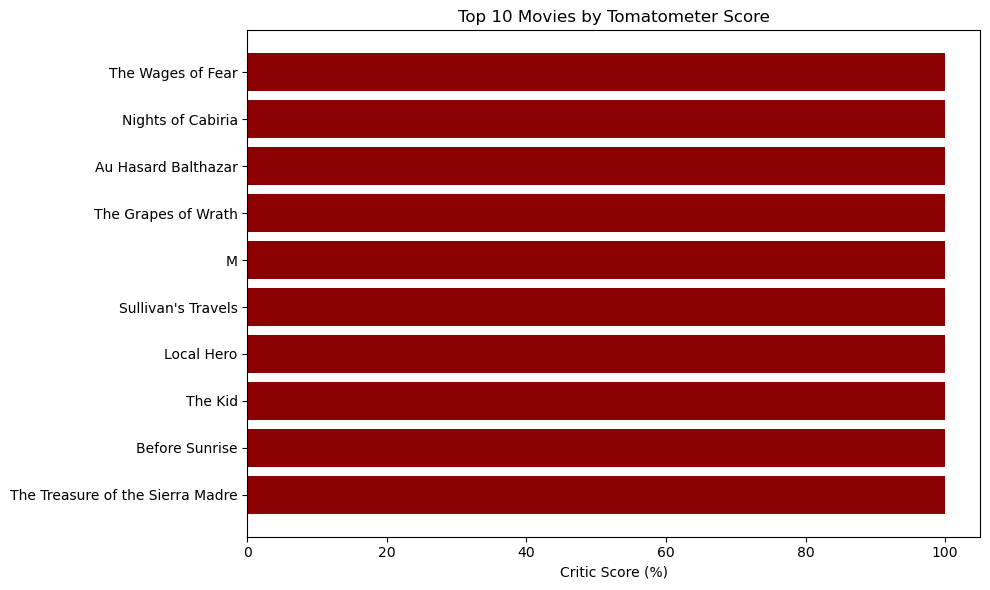

In [90]:

df['Critic Score'] = df['Critic Score'].astype(str).str.strip().str.replace('%', '', regex=False)

df['Critic Score'] = pd.to_numeric(df['Critic Score'], errors='coerce')

df = df.dropna(subset=['Critic Score'])

top_10 = df.sort_values(by='Critic Score', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_10['Title'], top_10['Critic Score'], color='darkred')
plt.xlabel('Critic Score (%)')
plt.title('Top 10 Movies by Tomatometer Score')
plt.gca().invert_yaxis()  # عشان الأعلى يظهر فوق
plt.tight_layout()
plt.show()


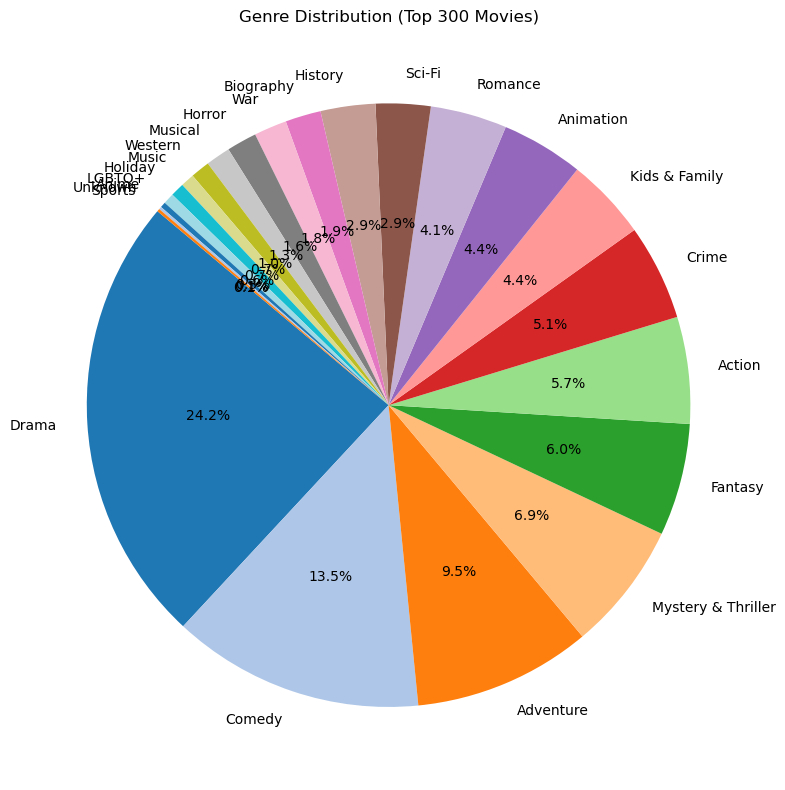

In [91]:
all_genres = df['Genre'].dropna().str.split(',').explode().str.strip()

genre_counts = all_genres.value_counts()

plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Genre Distribution (Top 300 Movies)')
plt.axis('equal')  
plt.tight_layout()
plt.show()


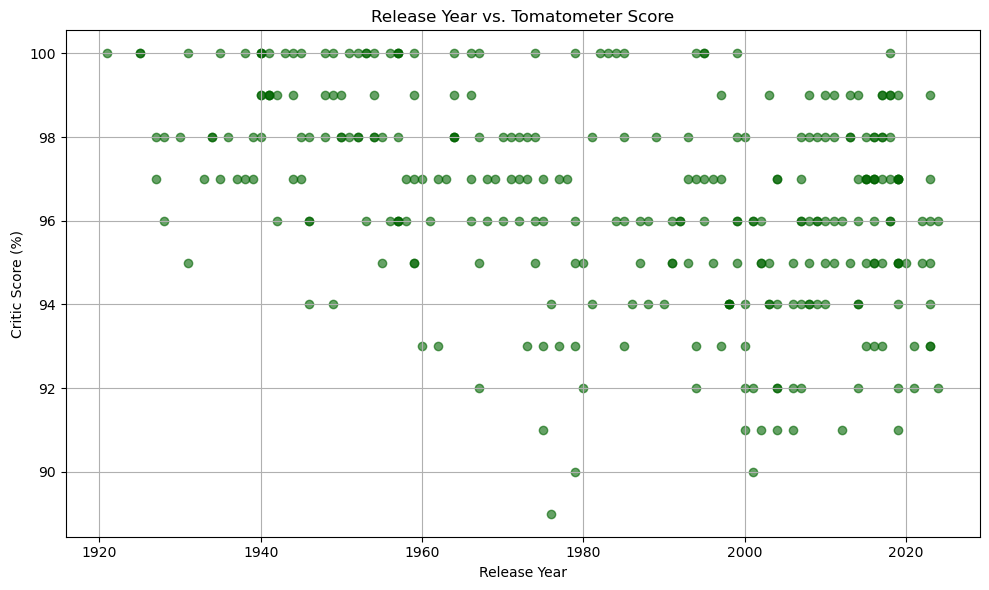

In [92]:
df['Critic Score'] = df['Critic Score'].astype(str).str.replace('%', '', regex=False)
df['Critic Score'] = pd.to_numeric(df['Critic Score'], errors='coerce')

# تأكدي من أن سنة الإصدار أرقام
df['Year of Release'] = pd.to_numeric(df['Year of Release'], errors='coerce')

# نحذف الصفوف اللي فيها بيانات ناقصة
filtered_data = df.dropna(subset=['Critic Score', 'Year of Release'])

# نرسم Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['Year of Release'], filtered_data['Critic Score'], alpha=0.6, color='darkgreen')
plt.title('Release Year vs. Tomatometer Score')
plt.xlabel('Release Year')
plt.ylabel('Critic Score (%)')
plt.grid(True)
plt.tight_layout()
plt.show()
